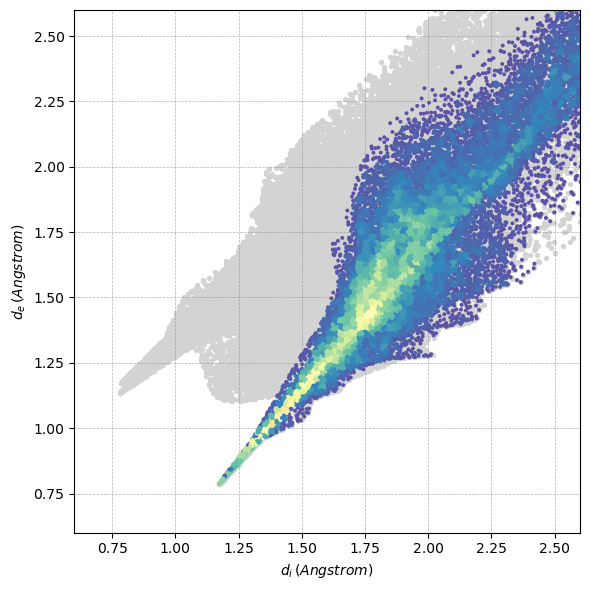

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv("iN_eH.txt", sep=r'\s+', header=None)
x1, y1 = df1[0], df1[1]
df2 = pd.read_csv("total.txt", sep=r'\s+', header=None)
x2, y2 = df2[0], df2[1]

# 计算点的密度
bins = 150  # 设定网格数
hist1, xedges1, yedges1 = np.histogram2d(x1, y1, bins=bins)
hist2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=bins)

# 获取每个点的密度
xidx1 = np.digitize(x1, xedges1) - 1
yidx1 = np.digitize(y1, yedges1) - 1
xidx2 = np.digitize(x2, xedges2) - 1
yidx2 = np.digitize(y2, yedges2) - 1

# 限制索引在有效范围内
xidx1 = np.clip(xidx1, 0, bins - 1)
yidx1 = np.clip(yidx1, 0, bins - 1)
xidx2 = np.clip(xidx2, 0, bins - 1)
yidx2 = np.clip(yidx2, 0, bins - 1)

# 获取每个点所在格子的密度值
density1 = hist1[xidx1, yidx1]
density2 = hist2[xidx2, yidx2]

# 绘制散点图，颜色根据密度调整
plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, s=8, c=density1, cmap='Spectral_r', vmin=np.min(density2), vmax=np.max(density2), edgecolors='none', zorder=2)
plt.scatter(x2, y2, s=8, color='lightgray', zorder=1)

plt.xlim(0.6, 2.6)
plt.ylim(0.6, 2.6)

plt.grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6, zorder=0)

plt.xlabel(r"$d_{i}\,(Angstrom)$")
plt.ylabel(r"$d_{e}\,(Angstrom)$")

plt.tight_layout()
plt.savefig("iN_eH.png", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:

# 选择 colormap 列表
cmaps = [
    'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
    'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
    'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
    'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
    'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
    'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
    'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
    'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
    'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 
    'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 
    'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
    'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 
    'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
    'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 
    'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
    'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
]

# 创建多个子图
num_cmaps = len(cmaps)
cols = 6
rows = (num_cmaps // cols) + (num_cmaps % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(6, 30))
axes = axes.flatten()

for i, cmap in enumerate(cmaps):
    ax = axes[i]
    sc = ax.scatter(x2, y2, s=8, c=density2, cmap=cmap, vmin=np.min(density2), vmax=np.max(density2), edgecolors='none')
    ax.set_title(cmap, fontsize=8)
    ax.set_xlim(0.6, 2.6)
    ax.set_ylim(0.6, 2.6)
    ax.axis("off")

# 移除多余的空白子图
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("cmaps.png", dpi=300, bbox_inches="tight")
plt.show()
